In [73]:
import numpy as np
X = np.array(([3,5],[5,1],[10,2]), dtype=float)
y = np.array(([75],[82],[93]), dtype=float)

In [74]:
X

array([[  3.,   5.],
       [  5.,   1.],
       [ 10.,   2.]])

In [75]:
y

array([[ 75.],
       [ 82.],
       [ 93.]])

In [98]:
class Neural_Network(object):
    def __init__(self):
        #Define HyperParameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
    
        #Weights (Parameters)
        self.W1 = np.random.rand(self.inputLayerSize, self.hiddenLayerSize)
        self.W2 = np.random.rand(self.hiddenLayerSize, self.outputLayerSize)
    
    def forward(self, X):
        self.z2 = np.dot(X, self.W1)
        self.a2 = sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        self.a3 = sigmoid(self.z3)
        yHat = sigmoid(self.z3)
        return yHat
    
    def sigmoid(self, z):
        #Apply Sigmoid Activation Function to scalar, vector, or matrix
        return 1/(1 + np.exp(-z))
    
    def sigmoidPrime(self, z):
        #Derivative of the signmoid activation function
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y use weights already defined in class
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
    
    def costFunctionPrime(self, X, y):
        #compute derivative with respect to W1 and W2 for a given X and y
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat),self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(np.transpose(self.a2), delta3)

        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)
        
        return dJdW1, dJdW2

In [99]:
NN = Neural_Network()
yhat = NN.forward(X)

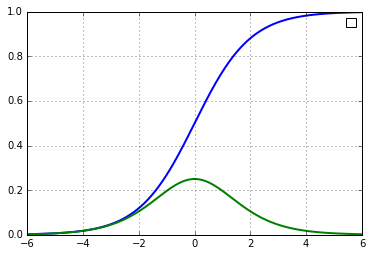

In [100]:
%matplotlib inline
import matplotlib.pyplot as plt
testInput = np.arange(-6,6,0.01)
plt.plot(testInput, NN.sigmoid(testInput), linewidth=2)
plt.plot(testInput, NN.sigmoidPrime(testInput), linewidth=2)
plt.grid(1)
plt.legend("sigmoid", "sigmoidPrime")

In [108]:
cost1 = NN.costFunction(X,y)
dJdW1, dJdW2 = NN.costFunctionPrime(X,y)
dJdW1

array([[  8.11678444e-35,   2.05075346e-33,   1.98564371e-03],
       [  1.62335884e-35,   8.42185228e-34,   7.35386167e-04]])

In [109]:
cost1

array([ 10376.1206899])

In [105]:
dJdW2

array([[ -8.84573759e-03],
       [ -7.02996297e-36],
       [ -5.23320941e-04]])

In [110]:
scalar = 3;
NN.W1 = NN.W1 = scalar * dJdW1
NN.W2 = NN.W2 = scalar * dJdW2
cost2 = NN.costFunction(X,y)
cost2

array([ 10499.])